In [17]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
%matplotlib inline

In [18]:
# scrapping data
df = pd.read_json('https://www.mohfw.gov.in/data/datanew.json')

In [19]:
# the last instance and feature sno should be removed
df.tail()

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,death_reconsille,total,state_code,actualdeath24hrs
32,33,Tripura,10,107750,106802,938,7,107752,106807,938,,,16,0
33,34,Uttarakhand,1098,448968,440125,7745,1102,448985,440138,7745,,,5,0
34,35,Uttar Pradesh,864,2125333,2100853,23616,818,2125425,2100991,23616,,,9,0
35,36,West Bengal,2108,2110507,2086912,21487,2205,2110790,2087097,21488,,1,19,1
36,37,,46848,44528524,43953374,528323,47922,44534188,43957929,528337,21,35,0,14


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sno               37 non-null     int64 
 1   state_name        37 non-null     object
 2   active            37 non-null     int64 
 3   positive          37 non-null     int64 
 4   cured             37 non-null     int64 
 5   death             37 non-null     int64 
 6   new_active        37 non-null     int64 
 7   new_positive      37 non-null     int64 
 8   new_cured         37 non-null     int64 
 9   new_death         37 non-null     int64 
 10  death_reconsille  37 non-null     object
 11  total             37 non-null     object
 12  state_code        37 non-null     int64 
 13  actualdeath24hrs  37 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 4.2+ KB


In [21]:
df = df.drop(36, axis=0).drop("sno", axis=1)

In [23]:
df.head()

,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,death_reconsille,total,state_code,actualdeath24hrs
0,Andaman and Nicobar Islands,7,10632,10496,129,7,10633,10497,129,,,35,0
1,Andhra Pradesh,288,2337803,2322782,14733,301,2337858,2322824,14733,,,28,0
2,Arunachal Pradesh,40,66813,66477,296,38,66814,66480,296,,,12,0
3,Assam,2819,745243,734390,8034,2808,745283,734441,8034,,,18,0
4,Bihar,455,849910,837155,12300,440,849993,837253,12300,,,10,0


In [24]:
df["state_name"].nunique()

36

In [26]:
len(df)

36

#### each instance cover covid-19 info for unique state 

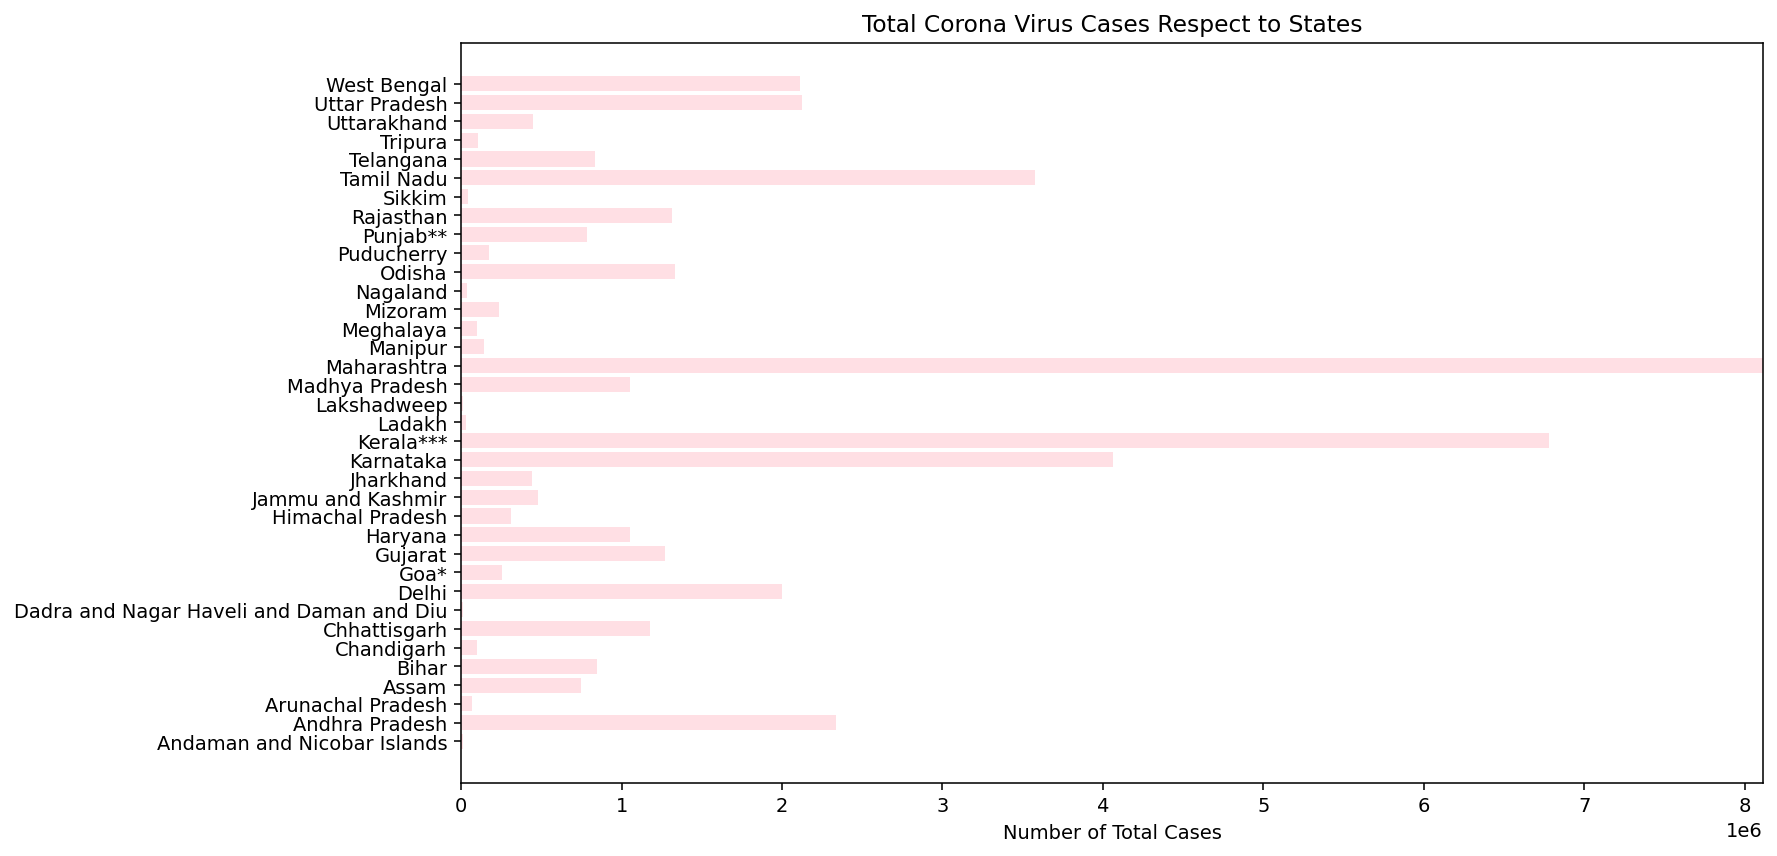

In [44]:
# total positive cases based on states in India
plt.figure(figsize=(12,7), dpi=140)
plt.barh(y=df["state_name"].unique(), width=df["positive"], align="center", color="pink",
            alpha=0.5)
plt.xlim(0, max(df["positive"]+200))
plt.title("Total Corona Virus Cases Respect to States")
plt.xlabel("Number of Total Cases");

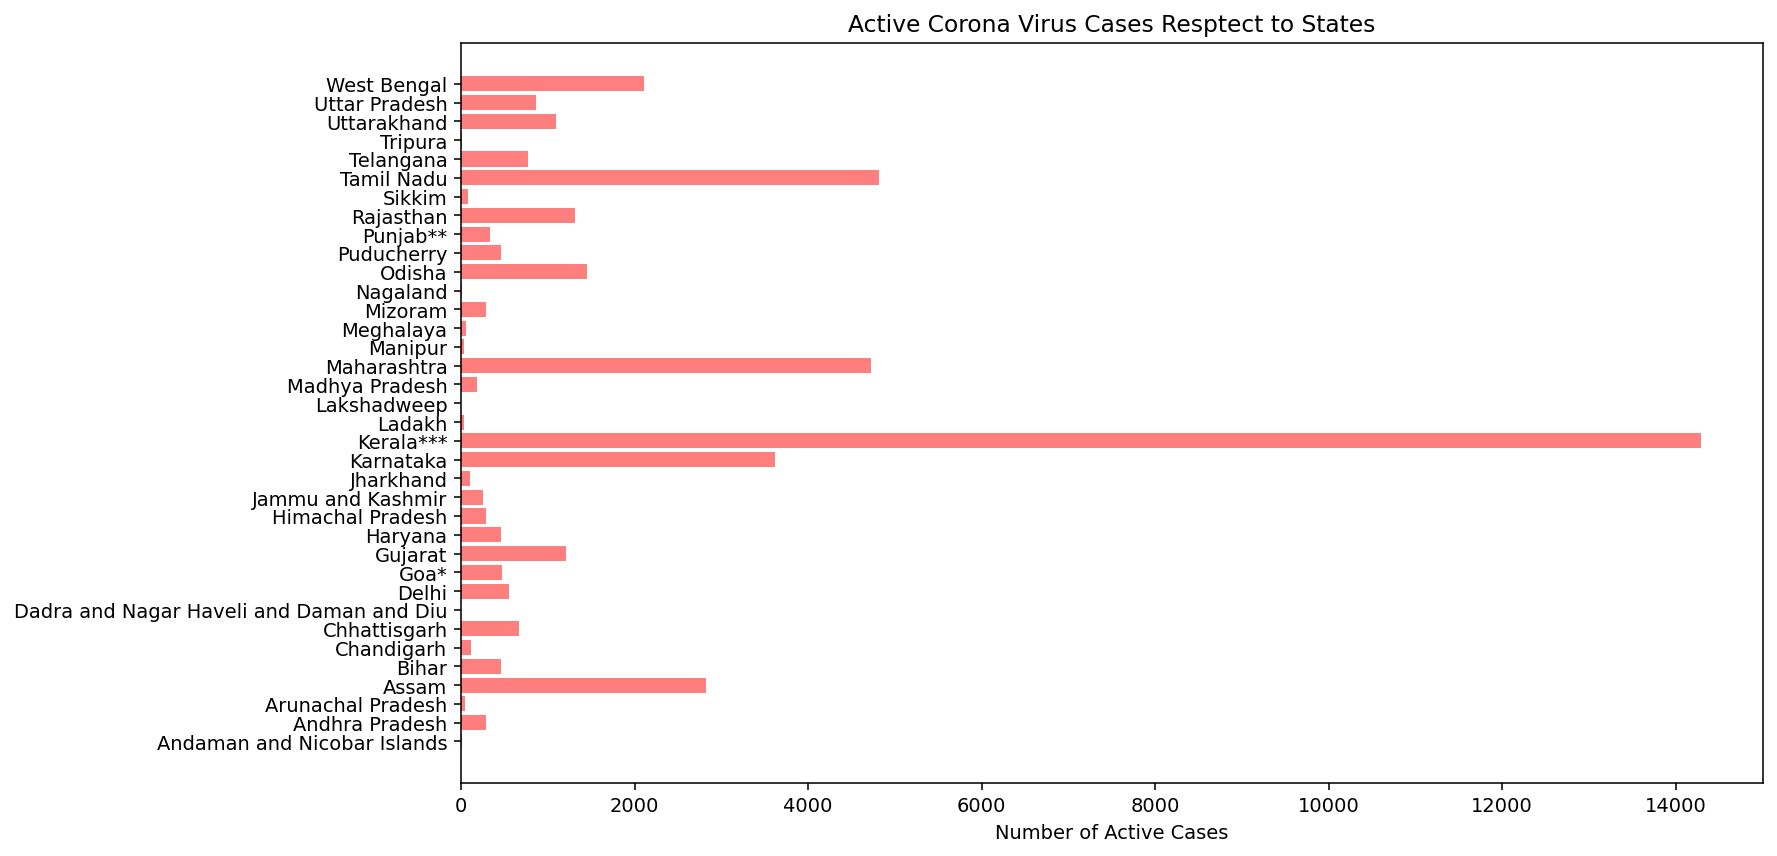

In [50]:
# active number of positive cases based on states in India
plt.figure(figsize=(12,7), dpi=140)
plt.barh(y=df["state_name"].unique(), width=df["active"], align="center", color=(1,0,0),
            alpha=0.5)
plt.title("Active Corona Virus Cases Resptect to States")
plt.xlabel("Number of Active Cases");

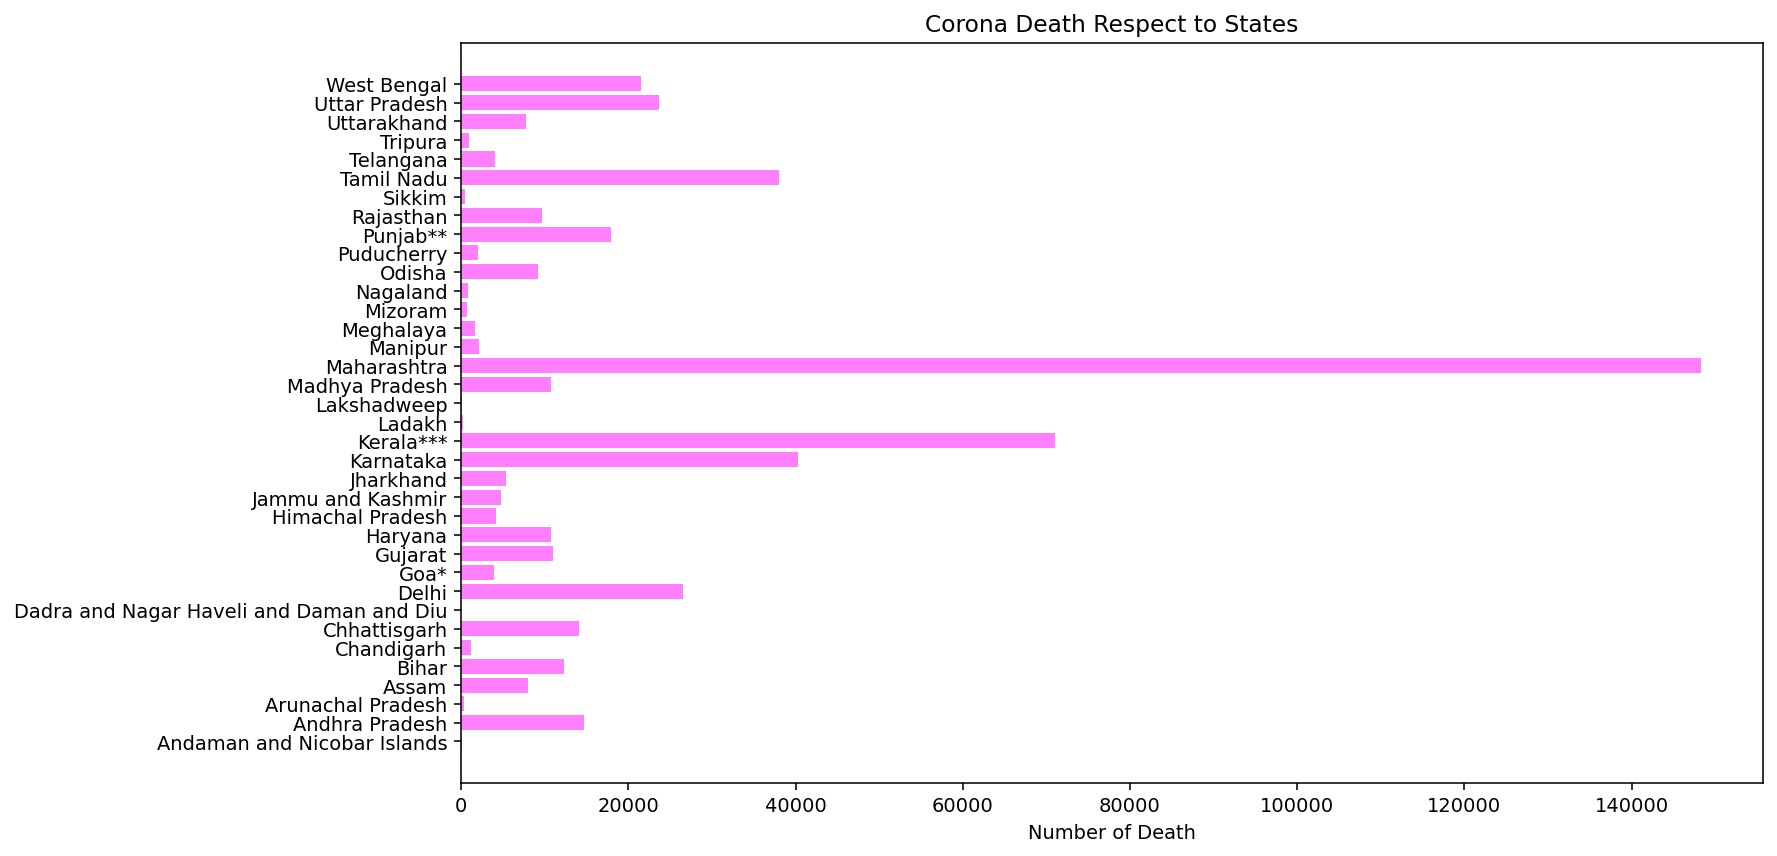

In [53]:
# number of death cases based on states in India
plt.figure(figsize=(12,7), dpi=140)
plt.barh(y=df["state_name"].unique(), width=df["death"], align="center", color=(1,0,1),
            alpha=0.5)
plt.title("Corona Death Respect to States")
plt.xlabel("Number of Death");

In [54]:
df.head()

,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,death_reconsille,total,state_code,actualdeath24hrs
0,Andaman and Nicobar Islands,7,10632,10496,129,7,10633,10497,129,,,35,0
1,Andhra Pradesh,288,2337803,2322782,14733,301,2337858,2322824,14733,,,28,0
2,Arunachal Pradesh,40,66813,66477,296,38,66814,66480,296,,,12,0
3,Assam,2819,745243,734390,8034,2808,745283,734441,8034,,,18,0
4,Bihar,455,849910,837155,12300,440,849993,837253,12300,,,10,0


In [59]:
df_stack = df.set_index("state_name", drop=True)

In [78]:
df_stack.head()

,active,positive,cured,death,new_active,new_positive,new_cured,new_death,death_reconsille,total,state_code,actualdeath24hrs
state_name,,,,,,,,,,,,
Andaman and Nicobar Islands,7,10632,10496,129,7,10633,10497,129,,,35,0
Andhra Pradesh,288,2337803,2322782,14733,301,2337858,2322824,14733,,,28,0
Arunachal Pradesh,40,66813,66477,296,38,66814,66480,296,,,12,0
Assam,2819,745243,734390,8034,2808,745283,734441,8034,,,18,0
Bihar,455,849910,837155,12300,440,849993,837253,12300,,,10,0


<Figure size 900x600 with 0 Axes>

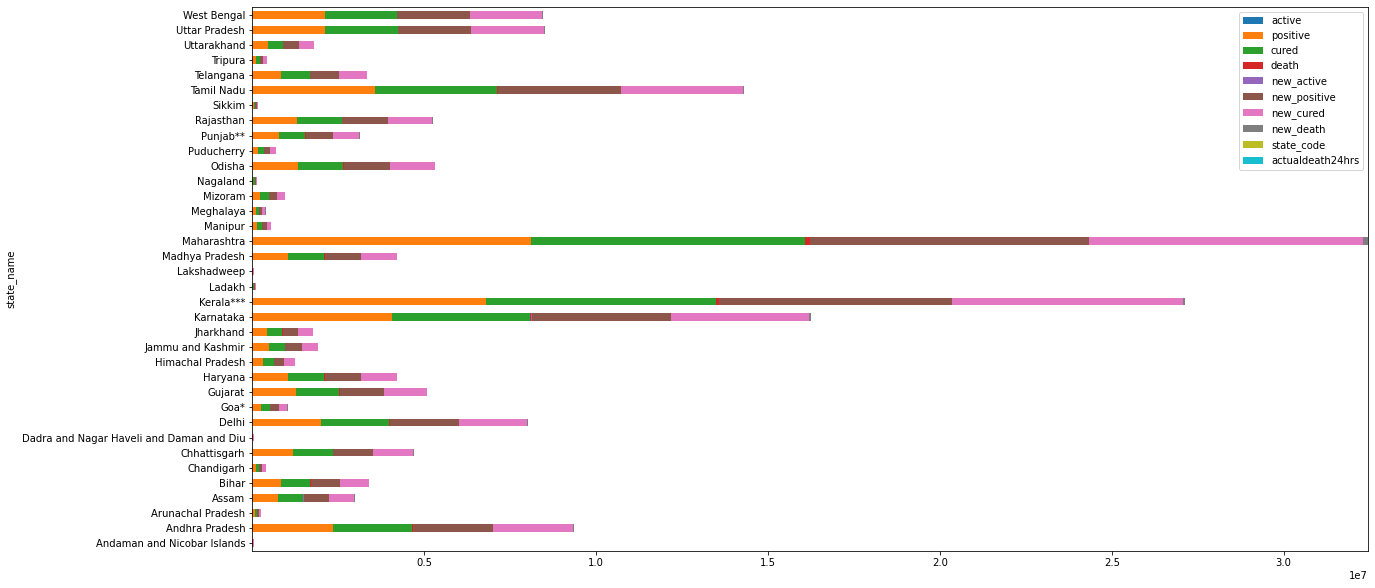

In [66]:
plt.figure(dpi=150)
df_stack.plot.barh(stacked=True, figsize=(20,10));

In [92]:
# stack barh for positive and cured features
df_stack = df_stack[["cured", "positive"]]

<Figure size 1200x800 with 0 Axes>

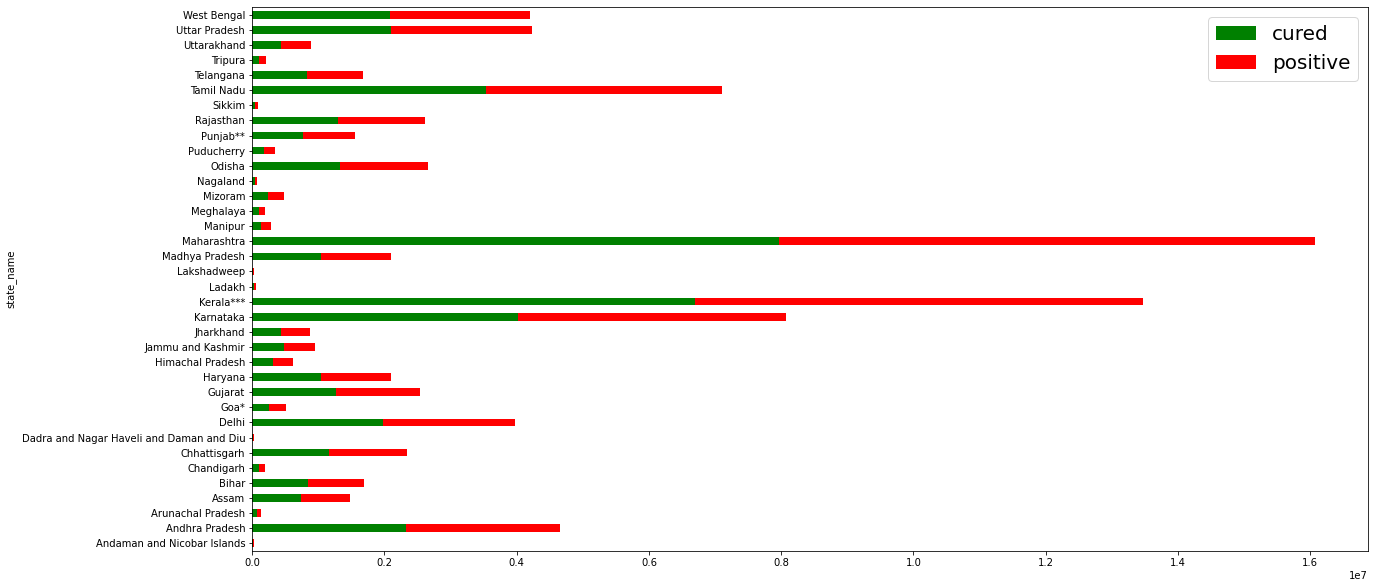

In [97]:
plt.figure(dpi=200)
df_stack.plot.barh(stacked=True, color={"cured":"green", "positive":"red"}, figsize=(20,10));
plt.legend(fontsize=20);